# DSCI 503 – Project 04
### Matt Snyder

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Part 1: Loading the Dataset; Preliminary Analysis
# *******************************************************

In [2]:
# The data is stored in the tab-delimited text file forest_cover.txt. Download this file into the directory that contains
# your notebook, and then load the data into a DataFrame named fc. 
fc = pd.read_table('forest_cover.txt')

# Use the head() method to display the first 5 rows of this DataFrame.
fc.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,Rawah,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,Rawah,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,Rawah,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,Rawah,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,Rawah,29,5


### *************************************
we will determine the size of the dataset. State what the results tell you about the
number of observations in the dataset.

In [3]:
# Print the shape of the fc DataFrame.
fc.shape

(15120, 13)

### **************
We will now inspect the distribution of cover types in the datasets. Add a markdown cell to briefly explain this.

In [9]:
# Without creating any new DataFrame variables, select the Cover_Type column from fc, then call its value_counts() method,
# followed by the sort_index() method.
sorted_cover_values = fc.loc[:, 'Cover_Type'].value_counts().sort_index()

# Display the result.
sorted_cover_values.head(10)

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: count, dtype: int64

### Seven Colors
Create a list of seven colors to be used as a palette in later plots.

In [7]:
# Create a list named palette containing seven named colors. 
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

## Part 2: Distribution of Cover Type by Wilderness Area
Start by determining the distribution of the wilderness areas within our dataset.

In [8]:
# Without creating any new DataFrame variables, select the Wilderness_Area column from fc, then call its
# value_counts() method, followed by the sort_index() method. 
sorted_wilderness_values = fc.loc[:, 'Wilderness_Area'].value_counts().sort_index()

# Display the result.
sorted_wilderness_values.head()

Wilderness_Area
Cache la Poudre    4675
Comanche Peak      6349
Neota               499
Rawah              3597
Name: count, dtype: int64

Now create a DataFrame to determine the how many regions of each cover type are in each of the four wilderness areas.

In [11]:
# Use pd.crosstab() to count the number of regions of each cover type that are in each of the four wilderness areas.
# Pass this function the Cover_Type column as its first argument and the Wilderness_Area column as the second
# argument. Store the results in a DataFrame named ct_by_wa
ct_by_wa = pd.crosstab(fc.loc[:, 'Cover_Type'], fc.loc[:, 'Wilderness_Area'])

# and then display this DataFrame.
ct_by_wa.head(10)

Wilderness_Area,Cache la Poudre,Comanche Peak,Neota,Rawah
Cover_Type,,,,
1,0,917,181,1062
2,20,940,66,1134
3,1297,863,0,0
4,2160,0,0,0
5,0,1304,0,856
6,1198,962,0,0
7,0,1363,252,545


Now visually represent the information in the above DataFrame, in the form of a stacked bar chart.

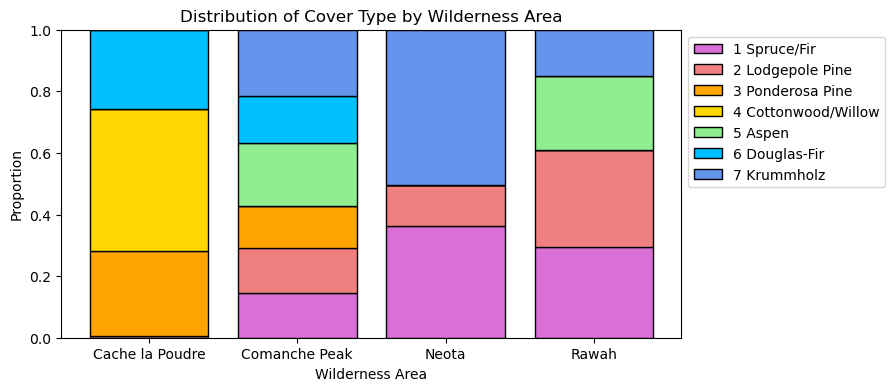

In [21]:
# Start by converting the count information into proportions. Create a DataFrame named ct_by_wa_props by
# dividing ct_by_wa by the column sums of ct_by_wa. 
cyl_sums = ct_by_wa.sum()
ct_by_wa_props = ct_by_wa / cyl_sums

# We will be creating a stacked bar chart, so we need to know where the bottom of each bar should be located.
# This can be calculated as follow: 
bb = np.cumsum(ct_by_wa_props) - ct_by_wa_props
# Create a Matplotlib figure, setting the figure size to [8, 4].
plt.figure(figsize=[8,4])

# add a cover type string value for the plot legend
cover_type_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-Fir', 'Krummholz']

# Loop over the rows of ct_by_wa_props. Each time this loop executes, add a bar chart to the figure
for i in range(0, len(ct_by_wa.iloc[:,0])):
    # The height of the bars should be determined by the current row of ct_by_wa_props.
    bar_height = ct_by_wa_props.iloc[i, :]
    # The bottom position of each bar should be determined by the current row of bb.
    bar_bottom = bb.iloc[i]
    # Each bar should have a black border, and a fill color determined by the current value of palette.
    color = palette[i]
    # The label for the legend should be set to the value of Cover_Type associated with the current row.
    label = f'{ct_by_wa.index[i]} {cover_type_names[ct_by_wa.index[i] - 1]}'
    plt.bar(x=ct_by_wa.columns, height=bar_height, color=color, edgecolor='black', bottom=bar_bottom, label=label)

    
# Set the labels for the x and y axes to be "Wilderness Area" and "Proportion". 
plt.xlabel('Wilderness Area')
plt.ylabel('Proportion')

# Set the title to be "Distribution of Cover Type by Wilderness Area"
plt.title('Distribution of Cover Type by Wilderness Area')

# Add a legend to the plot. 
plt.legend()

# Set the bbox_to_anchor parameter to place the legend to the right of the plot, near the top.
plt.legend(bbox_to_anchor=(1, 1))

# Display the figure using plt.show().
plt.show()